In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences


In [2]:
from keras.datasets import imdb

(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)


In [3]:
# Chargez les données IMDb avec les commentaires textuels
(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)

# Utilisez pad_sequences pour obtenir des séquences de longueur uniforme
max_sequence_length = 500  # Par exemple, fixez la longueur maximale des séquences à 200
train_samples = pad_sequences(train_samples, maxlen=max_sequence_length)
test_samples = pad_sequences(test_samples, maxlen=max_sequence_length)


In [3]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from gensim.models import KeyedVectors
import gensim.downloader as api

# Download the Word2Vec model (this might take a while)
word2vec_model = api.load('word2vec-google-news-300')


# word2vec_model = KeyedVectors.load_word2vec_format('Documents/17_NLP/GoogleNews-vectors-negative300.bin', binary=True)



In [10]:
# Save the downloaded model to a file
word2vec_model.save_word2vec_format('Documents\17_NLP\GoogleNews-vectors-negative300.bin', binary=True)


OSError: [Errno 22] Invalid argument: 'Documents\x0f_NLP\\GoogleNews-vectors-negative300.bin'

In [ ]:

# Create a tokenizer and fit on your IMDB data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data)

# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming Word2Vec embeddings are of size 100
for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

# Modify your model to use the embedding matrix
model = models.Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile and fit your model as before

In [5]:
from keras import models
from keras import layers
from keras.layers import Embedding, LSTM, Dense,GlobalAveragePooling1D

model = Sequential()

# Ajoutez une couche d'embedding pour convertir les indices en vecteurs denses
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
# model.add(layers.Flatten())  # Flatten layer to flatten the 3D tensor from Embedding layer
# # Ajoutez une couche LSTM pour le traitement séquentiel
# model.add(LSTM(64))
model.add(GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# Ajoutez une couche de sortie
model.add(Dense(1, activation='sigmoid'))


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(train_samples, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 [==============================] - 10s 30ms/step - loss: 0.6007 - accuracy: 0.7200 - val_loss: 0.4242 - val_accuracy: 0.8528
Epoch 2/5
313/313 [==============================] - 9s 29ms/step - loss: 0.3256 - accuracy: 0.8802 - val_loss: 0.3096 - val_accuracy: 0.8790
Epoch 3/5
313/313 [==============================] - 9s 29ms/step - loss: 0.2412 - accuracy: 0.9107 - val_loss: 0.2857 - val_accuracy: 0.8876
Epoch 4/5
313/313 [==============================] - 9s 29ms/step - loss: 0.1984 - accuracy: 0.9282 - val_loss: 0.2790 - val_accuracy: 0.8936
Epoch 5/5
313/313 [==============================] - 9s 29ms/step - loss: 0.1700 - accuracy: 0.9390 - val_loss: 0.2823 - val_accuracy: 0.8954


In [8]:
test_loss, test_accuracy = model.evaluate(test_samples, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


782/782 [==============================] - 3s 4ms/step - loss: 0.2870 - accuracy: 0.8873
Test Loss: 0.2870
Test Accuracy: 0.8873


782/782 [==============================] - 3s 4ms/step


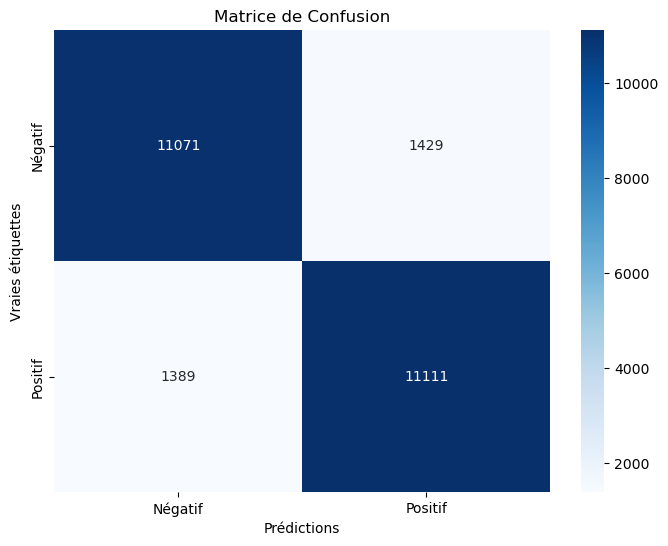

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prédisez les étiquettes pour les données de test
test_predictions = model.predict(test_samples)
test_predictions = (test_predictions > 0.5).astype(int)  # Convertissez les probabilités en classes binaires (0 ou 1)

# Créez une matrice de confusion
cm = confusion_matrix(test_labels, test_predictions)

# Affichez la matrice de confusion à l'aide de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()
